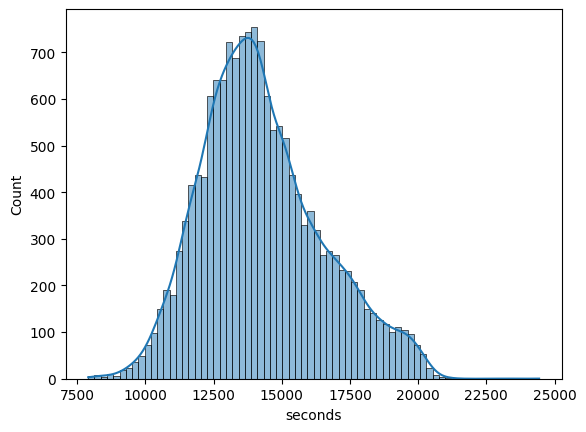

count    15817.000000
mean     14277.055952
std       2221.848322
min       7905.000000
25%      12709.000000
50%      13993.000000
75%      15598.000000
max      24434.000000
Name: seconds, dtype: float64
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=7905, statistic_sign=-1)


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('results2005.csv')

# Clean your data (if necessary)
data = data.dropna()

# Visualize the distribution of your data
sns.histplot(data['seconds'], kde=True)
plt.show()

# Calculate descriptive statistics
print(data['seconds'].describe())

# Perform a statistical test (e.g., Kolmogorov-Smirnov test)
from scipy.stats import kstest

# Assuming 'seconds' is normally distributed
result = kstest(data['seconds'], 'norm')
print(result)


Los datos obtenidos muestran una distribución ligeramente sesgada hacia la izquierda, con una desviación estándar que indica una dispersión considerable de los datos alrededor de la media. La prueba de Kolmogorov-Smirnov sugiere que los datos no siguen una distribución normal, lo cual es relevante para consideraciones estadísticas y de modelado.

In [33]:
import pandas as pd
import numpy as np
import scipy.stats as stats


data_2005 = pd.read_csv(f"results2005.csv")
data_2010 = pd.read_csv(f"results2010.csv")
data_2015 = pd.read_csv(f"results2015.csv")

times_2005 = data_2005["seconds"].dropna().tolist()
times_2010 = data_2010["seconds"].dropna().tolist()
times_2015 = data_2015["seconds"].dropna().tolist()


s5_10, p5_10 = stats.mannwhitneyu(times_2005, times_2010, alternative='two-sided')
s5_15, p5_15 = stats.mannwhitneyu(times_2005, times_2015, alternative='two-sided')
s10_15, p10_15 = stats.mannwhitneyu(times_2010, times_2015, alternative='two-sided')

print("2005 vs 2010")
print("Statistic: ", s5_10)
print("P Value: ", p5_10,"\n")

print("2005 vs 2015")
print("Statistic: ", s5_15)
print("P Value: ", p5_15, "\n")

print("2010 vs 2015 ")
print("Statistic: ", s10_15)
print("P Value: ", p10_15,"\n")

2005 vs 2010
Statistic:  224800194.0
P Value:  2.96605576998012e-124 

2005 vs 2015
Statistic:  280031451.0
P Value:  2.643202383662268e-281 

2010 vs 2015 
Statistic:  321809478.0
P Value:  8.137481892534864e-45 



El valor P es extremadamente pequeño, lo que indica que es muy improbable que las diferencias en los tiempos de las carreras de 2005 y 2010 sean simplemente debido al azar al igual que 2010/2015 y 2005/2015. Por lo tanto, se puede concluir que hay una diferencia significativa en los tiempos de las carreras entre 2005 y 2010.Esto podría indicar que hay cambios en los tiempos de las carreras a lo largo de estos años, posiblemente debido a mejoras en las condiciones de la carrera, cambios en las estrategias de los corredores, o una combinación de ambos.Es importante recordar que, aunque el test Mann-Whitney U es sensible a las diferencias en las distribuciones de los dos grupos, no proporciona información sobre la dirección de la diferencia (si los tiempos de 2015 son más rápidos o más lentos que los de 2005 o 2010).

In [34]:
import scipy.stats as stats
import pandas as pd

correlation, p_value = stats.spearmanr(data_2005['seconds'], data_2005['pace'])
print("Spearman's correlation:", correlation)
print("P-value:", p_value)


Spearman's correlation: 0.999992296852691
P-value: 0.0


Como era de esperarse existe una fuerte realcion entre la variable segundos y pace. 

In [35]:
import pandas as pd
import scipy.stats as stats

# Filtrar corredores menores de 20 años
under_20 = data_2005[data_2005['age'] < 20]['seconds']

# Filtrar corredores mayores de 60 años
over_60 = data_2005[data_2005['age'] > 60]['seconds']

# Realizar el t-test independiente
t_stat, p_value = stats.ttest_ind(under_20, over_60)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -7.821031162698099
P-value: 2.1539025631090672e-14


Aqui se observa cuan evidente es la diferencia de los tiempos entre las personas jovenes con respecto a las de las personas de la tercera edad. 

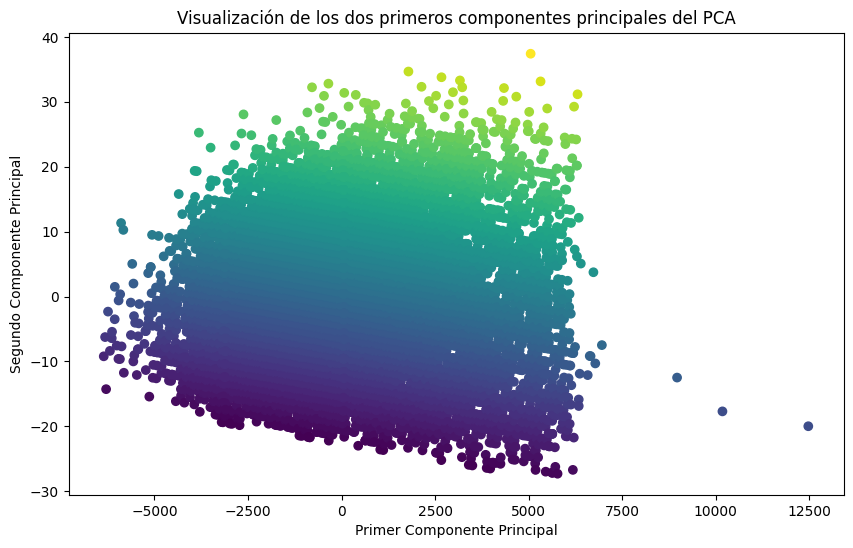

In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = data_2005[['age', 'seconds']]

# Realiza el PCA
pca = PCA(n_components=2) 
components = pca.fit_transform(X)

# Visualiza los dos primeros componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=data_2005['age'], cmap='viridis')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Visualización de los dos primeros componentes principales del PCA')
plt.show()
